Gurparteek Singh 
PHYS-2112 
Assignmnet 8

A8-1-TP7.3 [40] (infinite_series_pi)

Solve TP7.3 again by writing a function that takes k as a parameter (instead of iterating until the last term is 1e-15),
uses NumPy to calculate the series, and return the estimate.

In [1]:
import numpy as np
import scipy.special
import math

def factorial(n):
    """Computes factorial of n recursively."""
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        return result


def estimate_pi(k):
    """ k is the number of iterations """
    x=np.random.rand(k)
    i=0
    factor = 2 * math.sqrt(2) / 9801 
    
    while i<k: 
        num = factorial(4*i) * (1103 + 26390*i)
        den = factorial(i)**4 * 396**(4*i)
        term = factor * num / den
        x[i]=term
        i +=1
    return 1/x.sum()
    
    
def test_estimate_pi():
    assert estimate_pi(12) == math.pi
    

if __name__ == '__main__':
     test_estimate_pi()
      

A7-3 [50] (pi_monte_carlo)

One way to estimate the value of pi is to use the Monte Carlo method. Read https://en.wikipedia.org/wiki/Monte_Carlo_method which explains the general concept and which has this use as its first example in the "Overview" section.

Here is a pure Python solution:

import random
import sys

def mc_pi():
    inside_unit_circle = total_points = 0
    while True:
        total_points += 1
        a, b = random.random(), random.random()
        if a ** 2 + b ** 2 < 1:
            inside_unit_circle += 1
        yield 4 * inside_unit_circle / total_points


def main(max_iterations=200):
    for i, pi in enumerate(mc_pi()):
        if i > max_iterations:
            break
    print(pi)


if __name__ == '__main__':
    main(int(sys.argv[1]))
Implement a faster solution using NumPy. Use timeit to compare the speed of the two solutions.

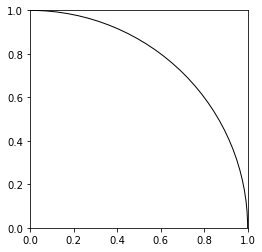

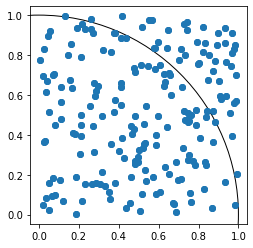

3.04
Part A


NameError: name 'time_1' is not defined

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit
import random
import sys

def mc_pi_numpy():
    #condition 1: Quadrat
    figure, axes = plt.subplots()
    draw_circle = plt.Circle((0, 0), 1, fill=False)
    axes.set_aspect(1)
    axes.add_artist(draw_circle)
    plt.show()

    #scatters the values
    MAX_VALUES = 200
    a, b = [np.random.random(MAX_VALUES) for _ in range(2)]

    #plots the scarrted values
    figure, axes = plt.subplots()
    draw_circle = plt.Circle((0, 0), 1,fill=False)
    axes.set_aspect(1)
    axes.add_artist(draw_circle)
    axes.add_artist(plt.scatter(x=a, y=b ,))
    plt.show()

    #times the numpy solution
    start_time1 = timeit.default_timer()
    #check for the values which are true // inside the quadrant 
    #and then sum them
    fx = a ** 2 + b ** 2 < 1
    print((fx.sum()/200)*4 )
    time_1 = timeit.default_timer() - start_time1
   
    

    
def mc_pi():
    inside_unit_circle = total_points = 0
    while True:
        total_points += 1
        a, b = random.random(), random.random()
        if a ** 2 + b ** 2 < 1:
            inside_unit_circle += 1
        yield 4 * inside_unit_circle / total_points

def main(max_iterations=200):
    for i, pi in enumerate(mc_pi()):
        if i > max_iterations:
            break
    print(pi)


if __name__ == '__main__':
    #times the pure python solution
    
    mc_pi_numpy()
    print('Part A')
    print('pi_monte_carlo took', time_1)
    
    print('Part B')
    start_time2 = timeit.default_timer()
    main()
    time_2 = timeit.default_timer() - start_time2
    print('Python solution took', time_2)


